# Análise Weak Supervision

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# FA-KES

In [2]:
df_gem = pd.read_csv('../../results/resultados_weak_supervision_fakes_train.csv')
df_ds = pd.read_csv('../../results/resultados_weak_supervision_fakes_train_deep_seek.csv')
df_test_gem = pd.read_csv('../../results/resultados_weak_supervision_fakes_test.csv')
df_test_ds = pd.read_csv('../../results/resultados_weak_supervision_fakes_test_deep_seek.csv')

In [3]:
df_label = pd.read_csv('../../data/y_train_fakes.csv')
df_label_test = pd.read_csv('../../data/y_test_fakes.csv')

In [4]:
df_gem['label'] = df_gem['label'].str.rstrip('\n')
df_test_gem['label'] = df_test_gem['label'].str.rstrip('\n')

df_ds['label'] = df_ds['label'].str.rstrip('\n')
df_test_ds['label'] = df_test_ds['label'].str.rstrip('\n')

In [5]:
df_test_ds.drop(378, inplace=True)

In [6]:
df_pivot_gem = df_gem.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')
df_pivot_test_gem = df_test_gem.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')

df_pivot_ds = df_ds.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')
df_pivot_test_ds = df_test_ds.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')

In [7]:
color_map = {'YES': 1, 'NO': -1, 'ABSTAIN': 0}
numeric_df_gem = df_pivot_gem.replace(color_map)
numeric_df_test_gem = df_pivot_test_gem.replace(color_map)

numeric_df_ds = df_pivot_ds.replace(color_map)
numeric_df_test_ds = df_pivot_test_ds.replace(color_map)

C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df_gem = df_pivot_gem.replace(color_map)
C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df_test_gem = df_pivot_test_gem.replace(color_map)
C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [8]:
cmap = sns.color_palette(['red', 'white', 'green'], as_cmap=True)

In [9]:
numeric_df_gem = numeric_df_gem.reset_index()
numeric_df_test_gem = numeric_df_test_gem.reset_index()
numeric_df_gem.drop(columns=['artigo'], inplace=True)
numeric_df_test_gem.drop(columns=['artigo'], inplace=True)

numeric_df_ds = numeric_df_ds.reset_index()
numeric_df_test_ds = numeric_df_test_ds.reset_index()
numeric_df_ds.drop(columns=['artigo'], inplace=True)
numeric_df_test_ds.drop(columns=['artigo'], inplace=True)

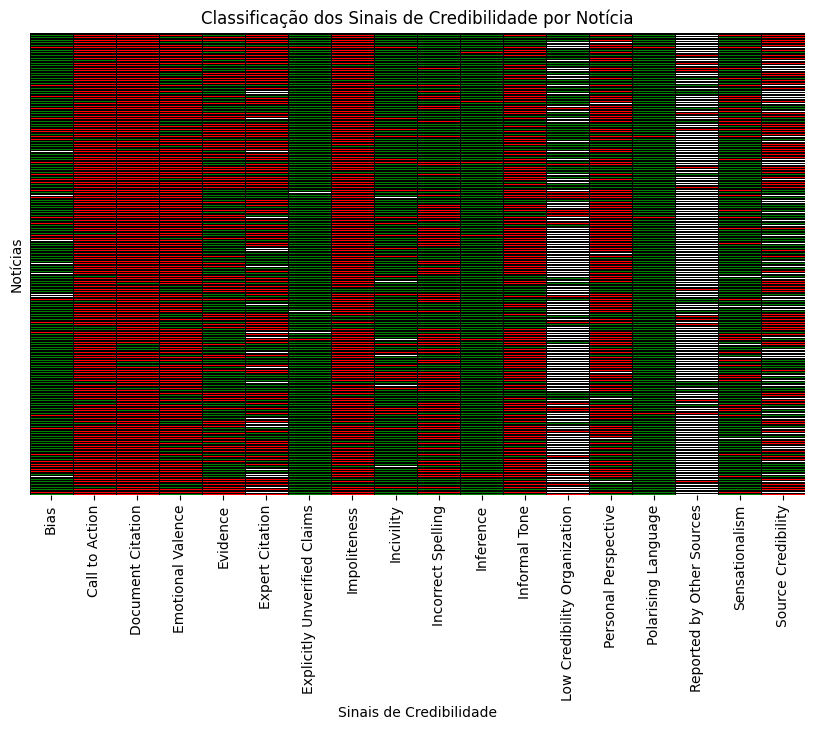

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df_gem[:300],
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=False,
)
plt.xlabel('Sinais de Credibilidade')
plt.ylabel('Notícias')
plt.title('Classificação dos Sinais de Credibilidade por Notícia')


plt.show()

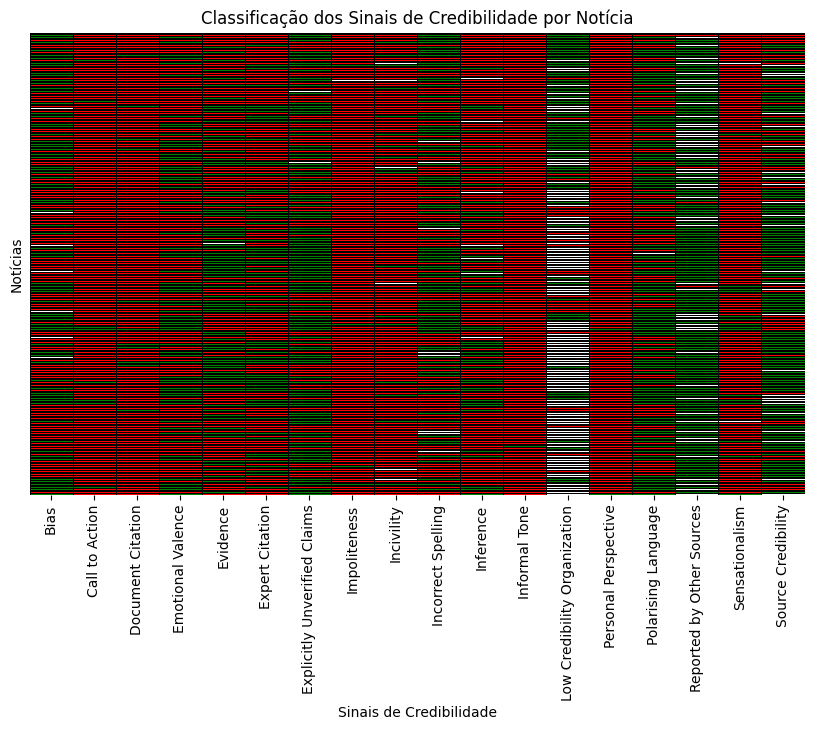

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df_ds[:300],
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=False,
)
plt.xlabel('Sinais de Credibilidade')
plt.ylabel('Notícias')
plt.title('Classificação dos Sinais de Credibilidade por Notícia')


plt.show()

## Montando um Modelo

In [12]:
df_model_gem = pd.concat([numeric_df_gem, df_label], axis=1)
df_model_test_gem = pd.concat([numeric_df_test_gem, df_label_test], axis=1)

df_model_ds = pd.concat([numeric_df_ds, df_label], axis=1)
df_model_test_ds = pd.concat([numeric_df_test_ds, df_label_test], axis=1)

In [13]:
df_model_gem.dropna(inplace=True)
df_model_test_gem.dropna(inplace=True)

df_model_ds.dropna(inplace=True)
df_model_test_ds.dropna(inplace=True)

In [14]:
X_gem = df_model_gem.drop(columns=['label'])  # Features
y_gem = df_model_gem['label']            
X_test_gem = df_model_test_gem.drop(columns=['label'])
y_test_gem = df_model_test_gem['label']        

X_ds = df_model_ds.drop(columns=['label'])  # Features
y_ds = df_model_ds['label']            
X_test_ds = df_model_test_ds.drop(columns=['label'])
y_test_ds = df_model_test_ds['label']        

### Regressão Logística

In [15]:
model_gem = LogisticRegression()
model_gem.fit(X_gem, y_gem)

model_ds = LogisticRegression()
model_ds.fit(X_ds, y_ds)

LogisticRegression()

In [16]:
# importance = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': model.coef_[0]
# })

In [17]:
# importance.sort_values('Importance', ascending=False)

In [18]:
probas_gem = model_gem.predict_proba(X_test_gem)
preds_gem = model_gem.predict(X_test_gem)

probas_ds = model_ds.predict_proba(X_test_ds)
preds_ds = model_ds.predict(X_test_ds)

In [19]:
print(classification_report(y_test_gem, preds_gem))

              precision    recall  f1-score   support

           0       0.53      0.38      0.44        61
           1       0.50      0.66      0.57        58

    accuracy                           0.51       119
   macro avg       0.52      0.52      0.50       119
weighted avg       0.52      0.51      0.50       119



In [20]:
print(classification_report(y_test_ds, preds_ds))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50        62
           1       0.47      0.48      0.48        58

    accuracy                           0.49       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.49      0.49      0.49       120



### XGBoost

In [21]:
model_gem = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_gem.fit(X_gem, y_gem)

model_ds = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_ds.fit(X_ds, y_ds)

d:\Rafael\MBA\TCC\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Rafael\MBA\TCC\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
y_pred_gem = model_gem.predict(X_test_gem)
print(classification_report(y_test_gem, y_pred_gem))

              precision    recall  f1-score   support

           0       0.52      0.38      0.44        61
           1       0.49      0.64      0.56        58

    accuracy                           0.50       119
   macro avg       0.51      0.51      0.50       119
weighted avg       0.51      0.50      0.50       119



In [23]:
y_pred_ds = model_ds.predict(X_test_ds)
print(classification_report(y_test_ds, y_pred_ds))

              precision    recall  f1-score   support

           0       0.54      0.48      0.51        62
           1       0.50      0.55      0.52        58

    accuracy                           0.52       120
   macro avg       0.52      0.52      0.52       120
weighted avg       0.52      0.52      0.52       120



# FAKE BR.Corpus

In [24]:
df_gem = pd.read_csv('../../results/resultados_weak_supervision_fakebr.csv')
df_test_gem = pd.read_csv('../../results/resultados_weak_supervision_fakebr_test.csv')

df_ds = pd.read_csv('../../results/resultados_weak_supervision_fakebr_train_deep_seek.csv')
df_test_ds = pd.read_csv('../../results/resultados_weak_supervision_fakebr_test_deep_seek.csv')

In [25]:
df_label = pd.read_csv('../../data/y_train_fakes.csv')
df_label_test = pd.read_csv('../../data/y_test_fakes.csv')

In [26]:
df_gem['label'] = df_gem['label'].str.rstrip('\n')
df_test_gem['label'] = df_test_gem['label'].str.rstrip('\n')

df_ds['label'] = df_ds['label'].str.rstrip('\n')
df_test_ds['label'] = df_test_ds['label'].str.rstrip('\n')

In [27]:
df_pivot_gem = df_gem.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')
df_pivot_test_gem = df_test_gem.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')

df_pivot_df = df_ds.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')
df_pivot_test_ds = df_test_ds.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')

In [28]:
color_map = {'YES': 1, 'NO': -1, 'ABSTAIN': 0}
numeric_df_gem = df_pivot_gem.replace(color_map)
numeric_df_test_gem = df_pivot_test_gem.replace(color_map)

numeric_df_ds = df_pivot_ds.replace(color_map)
numeric_df_test_ds = df_pivot_test_ds.replace(color_map)

C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df_gem = df_pivot_gem.replace(color_map)
C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df_test_gem = df_pivot_test_gem.replace(color_map)
C:\Users\rafae\AppData\Local\Temp\ipykernel_23652\4116514784.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [29]:
cmap = sns.color_palette(['red', 'white', 'green'], as_cmap=True)

In [30]:
numeric_df_gem = numeric_df_gem.reset_index()
numeric_df_test_gem = numeric_df_test_gem.reset_index()

numeric_df_ds = numeric_df_ds.reset_index()
numeric_df_test_ds = numeric_df_test_ds.reset_index()

In [31]:
numeric_df_gem.drop(columns=['artigo'], inplace=True)
numeric_df_test_gem.drop(columns=['artigo'], inplace=True)

numeric_df_ds.drop(columns=['artigo'], inplace=True)
numeric_df_test_ds.drop(columns=['artigo'], inplace=True)

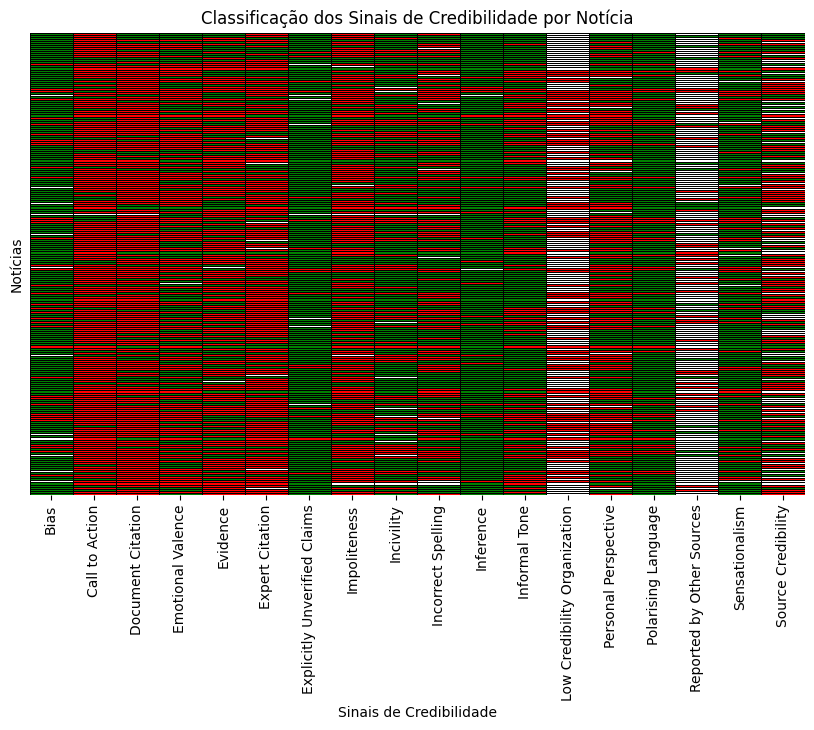

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df_gem[:300],
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=False,
)
plt.xlabel('Sinais de Credibilidade')
plt.ylabel('Notícias')
plt.title('Classificação dos Sinais de Credibilidade por Notícia')


plt.show()

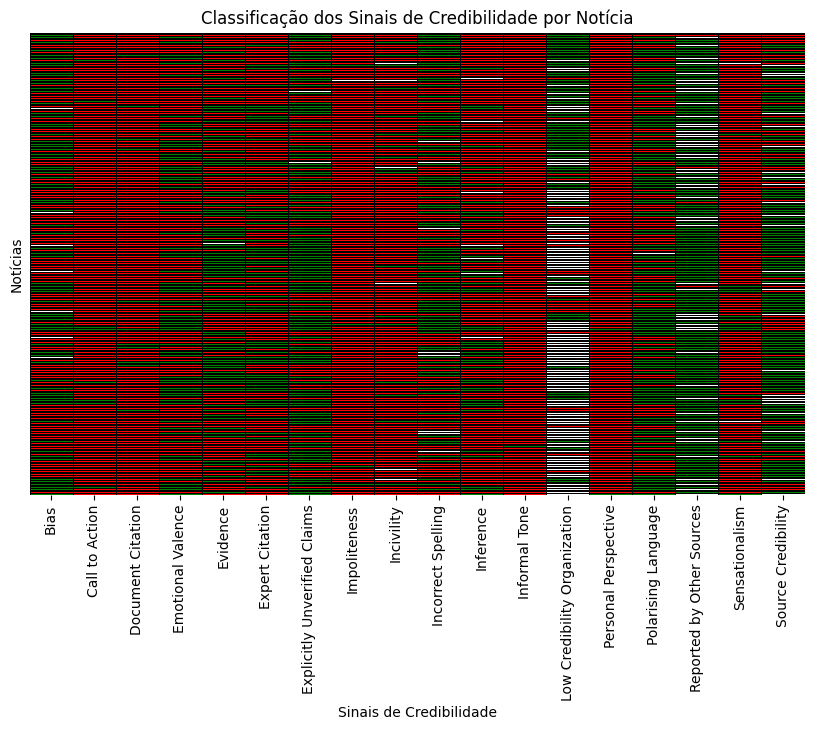

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df_ds[:300],
    cmap=cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=False,
)
plt.xlabel('Sinais de Credibilidade')
plt.ylabel('Notícias')
plt.title('Classificação dos Sinais de Credibilidade por Notícia')


plt.show()

## Montando um Modelo

In [34]:
df_model_gem = pd.concat([numeric_df_gem, df_label], axis=1)
df_model_test_gem = pd.concat([numeric_df_test_gem, df_label_test], axis=1)

df_model_ds = pd.concat([numeric_df_ds, df_label], axis=1)
df_model_test_ds = pd.concat([numeric_df_test_ds, df_label_test], axis=1)

In [35]:
df_model_gem.dropna(inplace=True)
df_model_test_gem.dropna(inplace=True)

df_model_ds.dropna(inplace=True)
df_model_ds.dropna(inplace=True)

In [36]:
X_gem = df_model_gem.drop(columns=['label'])  # Features
y_gem = df_model_gem['label']            
X_test_gem = df_model_test_gem.drop(columns=['label'])
y_test_gem = df_model_test_gem['label'] 

X_ds = df_model_ds.drop(columns=['label'])  # Features
y_ds = df_model_ds['label']            
X_test_ds = df_model_test_ds.drop(columns=['label'])
y_test_ds = df_model_test_ds['label'] 

### Regressão Logística

In [37]:
model_gem = LogisticRegression()
model_gem.fit(X_gem, y_gem)

LogisticRegression()

In [38]:
model_ds = LogisticRegression()
model_ds.fit(X_ds, y_ds)

LogisticRegression()

In [39]:
importance = pd.DataFrame({
    'Feature': X_gem.columns,
    'Importance': model_gem.coef_[0]
})
importance.sort_values('Importance', ascending=False)

,Feature,Importance
12,Low Credibility Organization,0.381343
17,Source Credibility,0.273865
2,Document Citation,0.253803
7,Impoliteness,0.196868
16,Sensationalism,0.137342
15,Reported by Other Sources,0.126898
10,Inference,0.118862
11,Informal Tone,0.117725
1,Call to Action,0.092832
6,Explicitly Unverified Claims,0.044199


In [40]:
importance = pd.DataFrame({
    'Feature': X_ds.columns,
    'Importance': model_ds.coef_[0]
})
importance.sort_values('Importance', ascending=False)

,Feature,Importance
4,Evidence,0.400180
7,Impoliteness,0.318874
9,Incorrect Spelling,0.204561
10,Inference,0.178502
14,Polarising Language,0.175263
16,Sensationalism,0.135426
0,Bias,0.086157
1,Call to Action,0.007168
12,Low Credibility Organization,-0.013493
17,Source Credibility,-0.050471


In [41]:
probas_gem = model_gem.predict_proba(X_test_gem)
preds_gem = model_gem.predict(X_test_gem)

probas_ds = model_ds.predict_proba(X_test_ds)
preds_ds = model_ds.predict(X_test_ds)

In [42]:
print(classification_report(y_test_gem, preds_gem))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45        62
           1       0.46      0.53      0.50        58

    accuracy                           0.47       120
   macro avg       0.48      0.48      0.47       120
weighted avg       0.48      0.47      0.47       120



In [43]:
print(classification_report(y_test_ds, preds_ds))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64        62
           1       0.58      0.38      0.46        58

    accuracy                           0.57       120
   macro avg       0.57      0.56      0.55       120
weighted avg       0.57      0.57      0.55       120



### XGBoost

In [44]:
model_gem = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_gem.fit(X_gem, y_gem)

d:\Rafael\MBA\TCC\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
model_ds = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_ds.fit(X_ds, y_ds)

d:\Rafael\MBA\TCC\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
y_pred_gem = model_gem.predict(X_test_gem)
print(classification_report(y_test_gem, y_pred_gem))

              precision    recall  f1-score   support

           0       0.45      0.37      0.41        62
           1       0.43      0.52      0.47        58

    accuracy                           0.44       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.44      0.44      0.44       120



In [47]:
y_pred_ds = model_ds.predict(X_test_ds)
print(classification_report(y_test_ds, y_pred_ds))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62        62
           1       0.59      0.60      0.60        58

    accuracy                           0.61       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.61      0.61      0.61       120



<Figure size 1000x800 with 0 Axes>

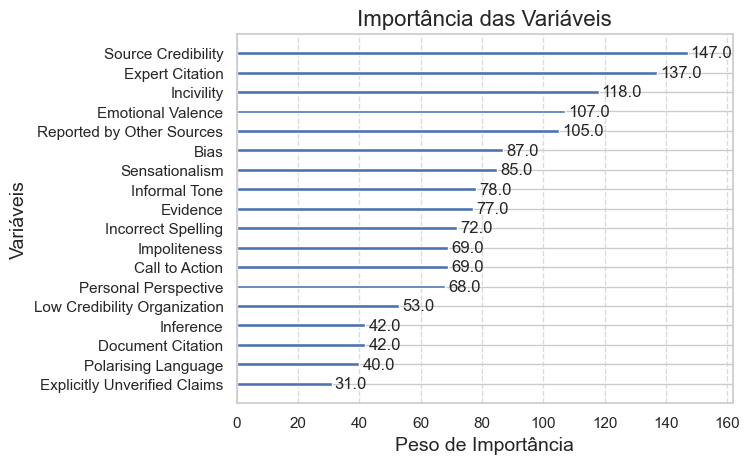

In [48]:
# Ajuste do estilo do Seaborn
sns.set(style='whitegrid')

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerando o gráfico de importância das variáveis
plot_importance(model_gem, importance_type='weight')

# Ajustando título e rótulos
plt.title('Importância das Variáveis', fontsize=16)
plt.xlabel('Peso de Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)

# Ajustando o layout para incluir o grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Adiciona linhas do grid no eixo X

# Exibindo o gráfico
plt.show()

<Figure size 1000x800 with 0 Axes>

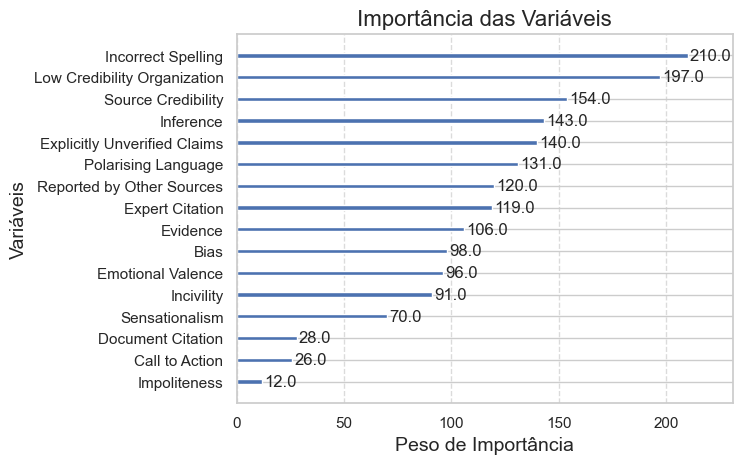

In [49]:
# Ajuste do estilo do Seaborn
sns.set(style='whitegrid')

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerando o gráfico de importância das variáveis
plot_importance(model_ds, importance_type='weight')

# Ajustando título e rótulos
plt.title('Importância das Variáveis', fontsize=16)
plt.xlabel('Peso de Importância', fontsize=14)
plt.ylabel('Variáveis', fontsize=14)

# Ajustando o layout para incluir o grid
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Adiciona linhas do grid no eixo X

# Exibindo o gráfico
plt.show()